# Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

# Шаг 1. Загрузка данных и подготовка их к анализу

Импортируем все нужные нам библиотеки

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings

Далее загружаем датасеты для того, чтобы ответить на вопросы первой части проекта

In [3]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

## Предобработка данных таблицы hypothesis


In [4]:
hypothesis.info()
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Как можно увидеть, с данными все нормально и они готовы для решения задач.

## Предобработка данных таблицы orders

In [5]:
orders.info()
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Здесь мы можем увидеть проблему с типом данных в столбце `date`. Заменим тип столбца на datetime.

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим дубликаты

In [7]:
print("Кол-во дубликатов =",orders.duplicated().sum())

Кол-во дубликатов = 0


Проверим максимальную и минимальную дату исследования методом describe()

In [39]:
orders["date"].describe()
warnings.filterwarnings("ignore")

Найдем количество пользователей в каждой группе AB-теста по заказам

In [9]:
print("Количество пользователей в группе А: ", orders[orders['group'] == 'A']['visitorId'].count())
print("Количество пользователей в группе B: ", orders[orders['group'] == 'B']['visitorId'].count())

Количество пользователей в группе А:  557
Количество пользователей в группе B:  640


Как можно увидеть, в группе В на 83 человека больше.

Проверим, сколько пользователей попали одновременно в обе группы

In [10]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Создадим список пользователей с уникальными visitorId и удалим этих пользователей из таблицы orders

In [11]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
orders = orders.query('visitorId not in @double_users')

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Больше в данной таблице ничего менять не нужно.

## Предобработка данных таблицы visitors

In [13]:
visitors.info()
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Поменяет тип данных в столбце в датой

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Также проверим наличие дубликатов

In [15]:
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


Посмотрим сколько групп в AB-тесте


In [16]:
print(visitors['group'].unique())

['A' 'B']


То есть в данном исследовании у нас присутствуют только две группы AB-теста

## Вывод

Проведена предобработка данных, проверили наличие дубликатов, а также заменили тип данных в столбцах, которые в этом нуждались.

# Шаг 2. Приоритизация гипотез

 **Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [17]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день..."
0,13.3,"Добавить два новых канала привлечения трафика,..."
7,11.2,Добавить форму подписки на все основные страни...
6,8.0,Показать на главной странице баннеры с актуаль...
2,7.0,Добавить блоки рекомендаций товаров на сайт ин...
1,2.0,"Запустить собственную службу доставки, что сок..."
5,1.3,"Добавить страницу отзывов клиентов о магазине,..."
3,1.1,"Изменить структура категорий, что увеличит кон..."
4,1.0,"Изменить цвет фона главной страницы, чтобы уве..."


**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [18]:
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,Добавить форму подписки на все основные страни...,10
2,56.0,Добавить блоки рекомендаций товаров на сайт ин...,8
0,40.0,"Добавить два новых канала привлечения трафика,...",3
6,40.0,Показать на главной странице баннеры с актуаль...,5
8,16.2,"Запустить акцию, дающую скидку на товар в день...",1
3,9.0,"Изменить структура категорий, что увеличит кон...",8
1,4.0,"Запустить собственную службу доставки, что сок...",2
5,4.0,"Добавить страницу отзывов клиентов о магазине,...",3
4,3.0,"Изменить цвет фона главной страницы, чтобы уве...",3


**Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.**

Для начала укажем, что RICE отличается от ICE параметром Reach(скольких пользователей затронет изменение, которое вы хотите внести).

Во фреймворке ICE лидирующие позиции занимают гипотезы с индексами 8, 0 и 7, в тоже время во фреймворке RICE лидирующие позиции занимают 7, 2 и 0. При сравнении двух таблиц можно увидеть, что лидер ICE спустился на 5 место в RICE. Вторая гипотеза переместилась на третье место, а вот гипотеза на 3 месте переместилась на первое имея Reach 10(то есть максимальный). Также можно заметить, что у лидера фреймворка ICE Reach равен 1, что является минимум среди остальных гипотез.

Исходя из всего вышесказанного, для тестирования задачи можно предложить гипотезу 7 и гипотезу 2.

# Шаг 2. Анализ A/B-теста

**1.Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

Создадим таблицу кумулятивных данных по двум таблицам

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


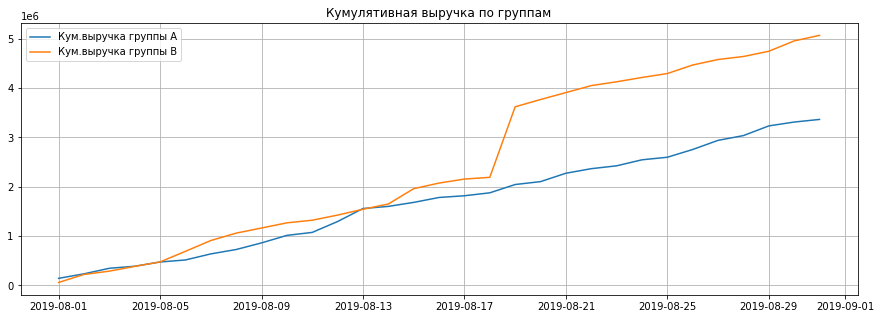

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.title('Кумулятивная выручка по группам')
plt.legend() 

**Вывод**

Как мы можем увидеть на графике, кумулятивная выручка группы В растет быстрее в  течении месяца, чем кум. выручка группы А. Особенно выражено это после точки соприкосновения 13 августа. А 19 числа идет рывок группы В. Я думаю, что это связано с каким-то крупным заказом, который прошел как раз в этот день(19 августа). 

**2.Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

Средний чек = выручка / число заказов

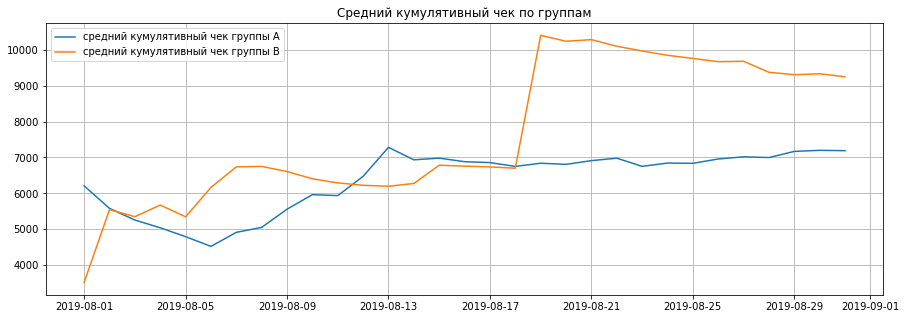

In [21]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.title('Средний кумулятивный чек по группам')
plt.legend()

**Вывод**

Здесь мы также видим сильное влияние на график заказа от 19 августа. Средний чек в тот день резко возрос, но в последующие дни начал по-тихоньку снижаться. Первуя половину месяца происходила доминация группы А по среднему чеку

**3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

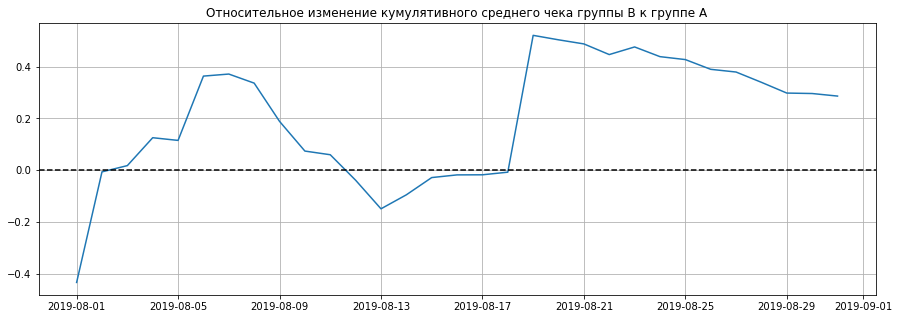

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--')

**Вывод**

Как мы можем увидеть, средний 13 августа группы А обгонял средний чек группы В, поэтому и относительное изменение в этот день ниже 0 на графике. Затем происходит рост с резким скачком 19 августа. Можно сказать, что данный график похож на график из предыдущего пункта.

**4.Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

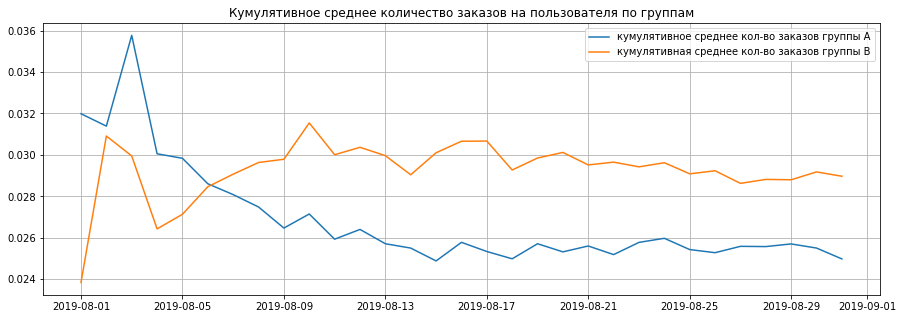

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивное среднее кол-во заказов группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная среднее кол-во заказов группы B')
plt.title('Кумулятивное среднее количество заказов на пользователя по группам')
plt.legend()

**Вывод**

Среднее количество заказов на пользователя группы В больше после 6 августа, чем по группе А, что вполне логично если смотреть на график среднего чека.

**5.Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

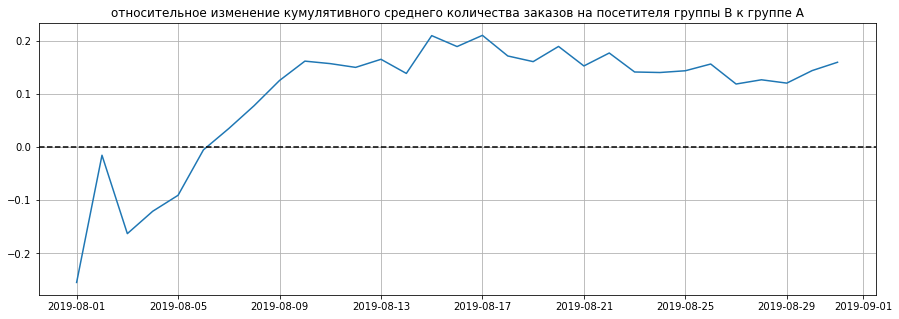

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 

**Вывод**

Данный график также похож на предыдущий в плане выводов. Здесь видна полная доминация группы В. После 6 августа относительное изменение кумулятивного среднего количества заказов на посетителя больше 0. Пик приходится на 15 число, а затем идет спад.

**6.Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


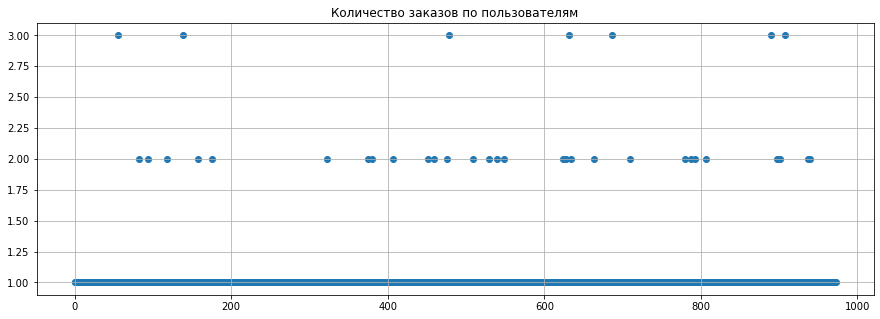

In [25]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])

**Вывод**

Как мы можем увидеть, большая часть пользователей совершила 1 заказ, тех кто совершил 2 заказа меньше, но тоже достаточно. Встречаются даже те, кто совершил 8,9 и 11 заказов, но это единичные случаи. Возможно это и есть те самые аномалии, которые мы отсечем в следующем пункте.

**7.Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.**

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Вывод**

Как можно увидеть не более 5% пользователей совершали более, чем 2 заказа и не более 1% пользователей совершали более, чем 4 заказов. В качестве границы определния аномальных пользователей возьмем тех, кто делал больше двух заказов. То есть мы рассматриваем только тех, кто сделал 1 и 2 заказа.

**8.Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

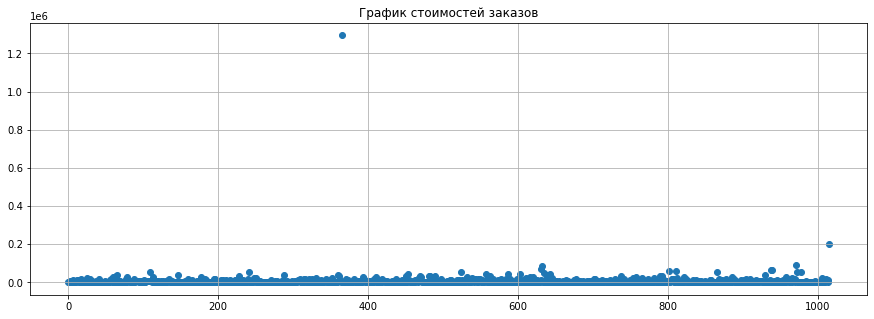

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'])

На данном графике мало, что видно, попробуем рассмотреть по-другому

In [28]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

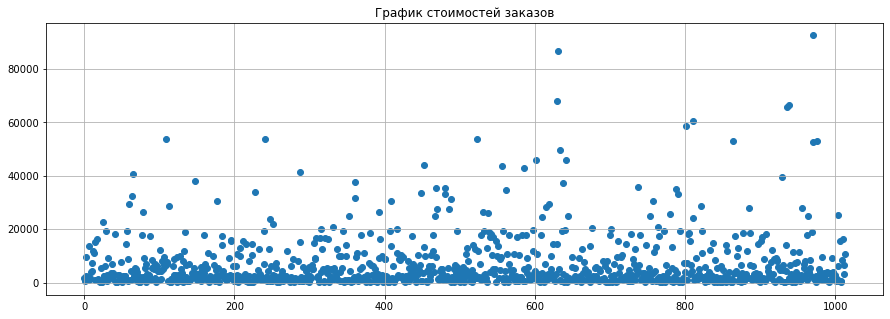

In [29]:
ord = orders[orders['revenue'] < 150000]['revenue']
x_val = pd.Series(range(0,len(ord)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_val, ord)

Большая часть заказов сконцентрирована до 60 тысяч рублей. Конечно есть выбросы, где заказы более чем на 100 тысяч. В следующем пункте найдем границу.

**9.Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей заказывают более чем на 28000 рублей и не более 1% пользователей заказывают более чем на 58000 рублей. Так как 99% пользователей делают заказы на сумму меньше 58233 рублей, то возьмем эту цифру как границу между аномальными заказами и теми, которые мы рассматриваем.

**10.Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.**

Создадим общую таблицу по заказам и визитам

In [31]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


H0: статистически значимых различий в конверсии между группами нет

H1: статистически значимые различия в конверсии между группами есть

In [32]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

p-value = 0.011
0.160


Нулевая гипотеза отвергается, значит, что статистически значимые различия между группами есть. Относительный выигрыш группы В над группой А равен 13,8%.

**11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

Н0: статистически значимых различий в средних чеках между группами нет

Н1: статистически значимые различия в средних чеках между группами есть

In [33]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
0.287


Так как p-value больше 0.05, то нулевая гипотеза принимается, а значит, что статистически значимых различий нет и средние чеки схожи. Средний чек группы В больше на 25,9%, чем средний чек группы А.


**12.Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.**

В данном пункте сделаем срез данных и проверим, как действия попавших в срез влияют на результат. Сделаем срез пользователей совершивших более 2 заказов и сумма покупки которых больше 58 тысяч

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(len(abnormalUsers)) 
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Применим статистический критерий Манна-Уитни к полученным выборкам

H0: статистически значимых различий в конверсии между группами нет

H1: статистически значимые различия в конверсии между группами есть

In [35]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
0.189


Так как p-value меньше 0.05, то мы отвергаем нулевую гипотезу, значит статистически значимые различия в конверсии между группами есть. Относительный выигрыш группы В над группой А равен 17,4%.

**13.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.**

H0: Статистически значимых различий в средних чеках между группами нет

H1: Статистически значимые различия в средних чеках между группами есть

In [36]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.788
-0.032


Как мы видим p-value больше 0.05, а значит, что мы принимаем нулевую гипотезу, то есть статистически значимых различий в средних чеках между группами нет. Средний чек группы В ниже на 2%, чем средний чек группы А.


# Вывод

**14.Примем решение по результатам теста и объясним его.**

1) Если рассмотреть средний количество заказов на пользователя по сырым данным, то относительный выигрыш группы В над группой А равен 13,8%. В тоже время по очищенным данным он равен 17,4%.

2) Средний чек группы В по сырым данным больше на 25,9%, чем средний чек группы А, а относительный выигрыш по очищенным данным группы В меньше на 2%, чем у группы А.

Из этих результатов можно сделать вывод, что после того, как мы убрали аномалии по среднему чеку, то они сравнялись между группами, а вот выигрыш среднего количества заказов остается за группой В даже после того, как мы убрали аномалии.

Исходя из вышесказанного, тест нужно остановить и сказать, что группа В оказалась эффективнее по среднему количеству заказов на пользователя, при равных средних чеках в группах.